Valores nulos antes de la imputación:
customerid                0
gender                    0
age                       0
annual income (k$)        0
spending score (1-100)    0
dtype: int64

Valores nulos después de la imputación:
customerid                0
gender                    0
age                       0
annual income (k$)        0
spending score (1-100)    0
dtype: int64

Descripción de los datos:
       customerid         age  annual income (k$)  spending score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000

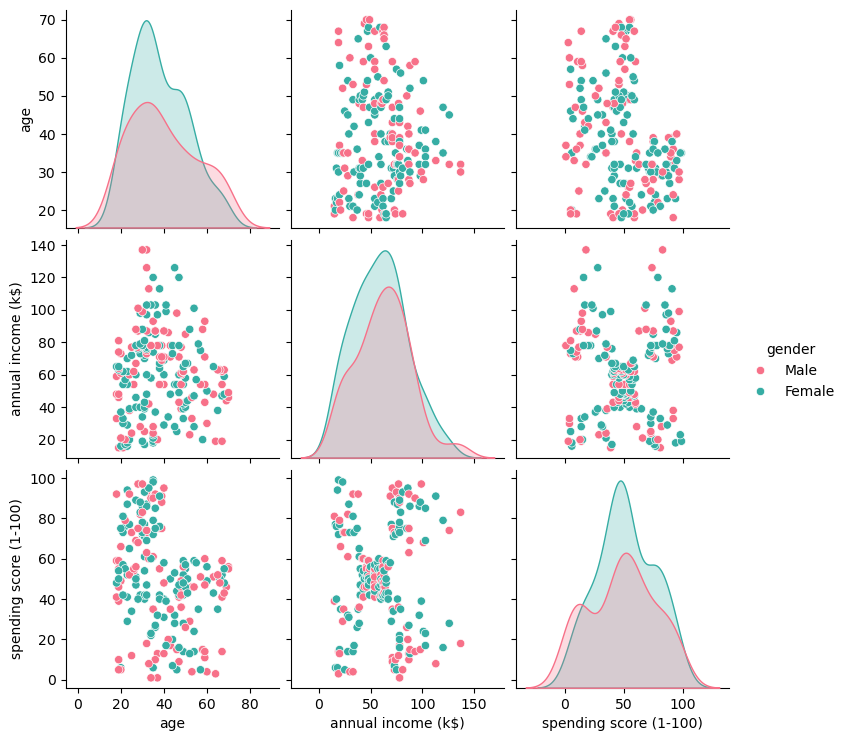

C:\Users\juans\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\juans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the

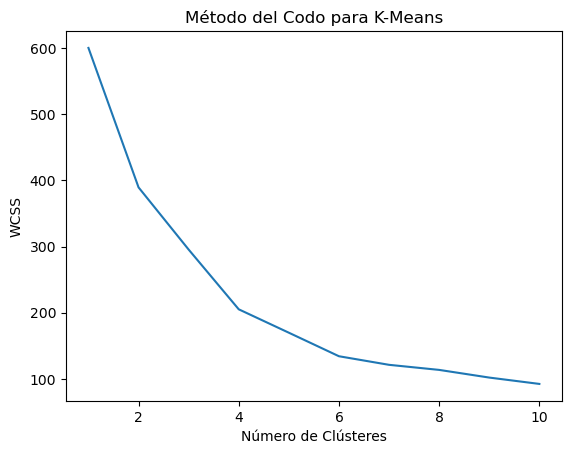


Silhouette Score K-Means: 0.4085
Calinski-Harabasz Index K-Means: 123.4187


C:\Users\juans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


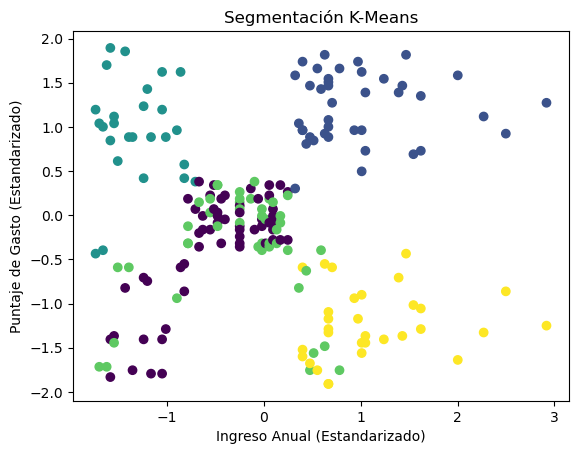

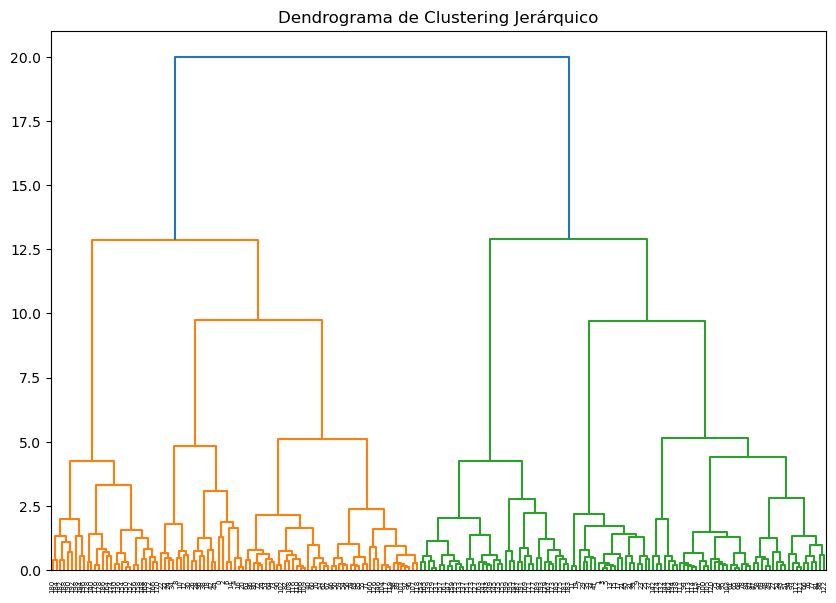


Silhouette Score Clustering Jerárquico: 0.3900
Calinski-Harabasz Index Clustering Jerárquico: 107.8266


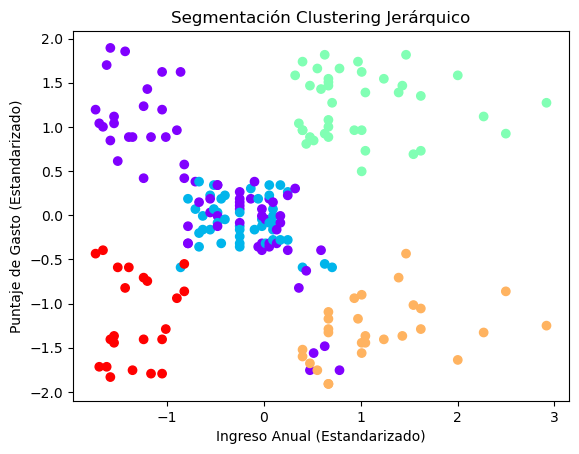

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar el dataset desde la ruta especificada
df = pd.read_csv(r'C:\Users\juans\Downloads\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv')

# Normalización de nombres de columnas a minúsculas y eliminación de espacios en blanco
df.columns = df.columns.str.strip().str.lower()

# Verificar si las columnas requeridas están presentes
required_columns = ['customerid', 'gender', 'age', 'annual income (k$)', 'spending score (1-100)']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Faltan las siguientes columnas en el DataFrame: {missing_columns}")

# Comprobar valores nulos
print("Valores nulos antes de la imputación:")
print(df.isnull().sum())

# Imputación de valores nulos
# Para columnas numéricas, imputar con la mediana
num_imputer = SimpleImputer(strategy='median')
num_columns = df.select_dtypes(include=np.number).columns
df[num_columns] = num_imputer.fit_transform(df[num_columns])

# Para columnas categóricas, imputar con el valor más frecuente (moda)
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = df.select_dtypes(include='object').columns
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

# Verificar nuevamente si hay valores nulos
print("\nValores nulos después de la imputación:")
print(df.isnull().sum())

# Análisis exploratorio de datos
print("\nDescripción de los datos:")
print(df.describe())

# Visualización de la distribución de variables
sns.pairplot(df.drop('customerid', axis=1), hue='gender', palette='husl')
plt.show()

# Preprocesamiento: Eliminación de columnas irrelevantes y codificación
df = df.drop('customerid', axis=1)  # Eliminamos CustomerID
df['gender'] = df['gender'].map({'male': 0, 'female': 1})  # Codificamos Gender

# Escalamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Validación: Verificar si hay valores NaN o infinitos después del escalado
if np.any(np.isnan(scaled_data)) or np.any(np.isinf(scaled_data)):
    
    imputer = SimpleImputer(strategy='median')
    scaled_data = imputer.fit_transform(scaled_data)
    
    # Verificar nuevamente si se han eliminado todos los NaN e infinitos
    assert not np.any(np.isnan(scaled_data)) and not np.any(np.isinf(scaled_data))

# K-Means Clustering
# Determinación del número óptimo de clústeres usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Gráfica del método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

# Entrenamiento del modelo K-Means
optimal_clusters = 5  # Ajustar según el resultado del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluación del modelo K-Means
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(scaled_data, kmeans_labels)
print(f'\nSilhouette Score K-Means: {silhouette_kmeans:.4f}')
print(f'Calinski-Harabasz Index K-Means: {calinski_kmeans:.4f}')

# Visualización K-Means
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=kmeans_labels, cmap='viridis')
plt.title('Segmentación K-Means')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.show()

# Clustering Jerárquico
# Dendrograma para determinar el número de clústeres
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

# Entrenamiento del modelo de Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Evaluación del modelo de Clustering Jerárquico
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
calinski_hierarchical = calinski_harabasz_score(scaled_data, hierarchical_labels)
print(f'\nSilhouette Score Clustering Jerárquico: {silhouette_hierarchical:.4f}')
print(f'Calinski-Harabasz Index Clustering Jerárquico: {calinski_hierarchical:.4f}')

# Visualización Clustering Jerárquico
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=hierarchical_labels, cmap='rainbow')
plt.title('Segmentación Clustering Jerárquico')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.show()